In [53]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
pd.set_option('display.max_columns', None)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
import tensorflow as tf

Load Data

In [54]:
df_test = pd.read_csv("../PreparedData/test.csv")
df_train = pd.read_csv("../PreparedData/train.csv")

## Final Tweaks to Data before feeding into Neural Network

One hot encode

In [55]:
columns_to_encode = ["country", "field_edu"]

In [56]:
df_train = pd.get_dummies(df_train,columns= columns_to_encode, drop_first=True)
df_train.head(5)

,user_id,location,moved_after_2019,companies_worked,max_duration,Business,Design,IT,Other,N_Skills,English,German,Turkish,French,Spanish,Chinese,NLanguages,start_date_edu,end_date_edu,degree_edu,country_TR,country_Unsure,field_edu_Engineering,field_edu_Mathematics,field_edu_Other,field_edu_Science
0,1301,Turkey,1,4,1645,2,0,4,17,23,3,0,5,0,0,0,4,2100-01-01,2100-01-01,2,0,1,0,0,1,0
1,6950,Turkey,0,4,1402,0,0,17,32,49,3,0,0,0,0,0,3,2100-01-01,2100-01-01,1,1,0,0,0,1,0
2,4880,Turkey,0,4,1216,0,2,4,15,21,2,0,5,0,0,0,2,2100-01-01,2100-01-01,2,1,0,0,0,1,0
3,26046,Turkey,0,1,1856,0,0,7,23,30,2,0,0,0,0,0,2,2100-01-01,2100-01-01,2,0,1,0,0,0,0
4,11005,Turkey,0,3,2769,0,1,10,37,48,3,0,5,0,0,0,3,2100-01-01,2100-01-01,1,0,1,0,0,1,0


In [57]:
df_test = pd.get_dummies(df_test,columns= columns_to_encode, drop_first=True)
df_test.head(5)

,user_id,location,moved_after_2019,companies_worked,max_duration,Business,Design,IT,Other,N_Skills,English,German,Turkish,French,Spanish,Chinese,NLanguages,start_date_edu,end_date_edu,degree_edu,country_TR,country_Unsure,field_edu_Engineering,field_edu_Mathematics,field_edu_Other,field_edu_Science
0,17449,Turkey,2,3,4017,1,0,11,22,34,2,0,4,0,0,0,2,2100-01-01,2100-01-01,2,0,1,1,0,0,0
1,33967,Turkey,2,2,730,2,9,1,19,31,5,0,5,0,0,1,2,2100-01-01,2100-01-01,4,0,1,1,0,0,0
2,2110,Turkey,2,2,0,3,0,2,8,13,2,1,5,0,0,0,4,2100-01-01,2100-01-01,2,0,1,0,0,1,0
3,55082,Turkey,2,2,2011,0,0,12,25,37,2,0,2,0,0,0,1,2100-01-01,2100-01-01,2,1,0,0,0,0,0
4,37165,Turkey,2,1,944,0,0,0,4,4,4,0,5,0,0,0,2,2100-01-01,2100-01-01,1,1,0,1,0,0,0


Modify education field

In [58]:
df_train[(df_train.start_date_edu > "2019-01-01") & (df_train.start_date_edu < "2025-01-01")]

,user_id,location,moved_after_2019,companies_worked,max_duration,Business,Design,IT,Other,N_Skills,English,German,Turkish,French,Spanish,Chinese,NLanguages,start_date_edu,end_date_edu,degree_edu,country_TR,country_Unsure,field_edu_Engineering,field_edu_Mathematics,field_edu_Other,field_edu_Science
10,40150,Turkey,0,1,1280,0,0,4,9,13,2,0,5,0,0,0,2,2020-09-01,2021-09-01,1,0,1,1,0,0,0
74,33516,Turkey,0,1,487,0,0,2,4,6,3,0,5,0,0,0,2,2021-10-01,2100-01-01,2,1,0,0,0,1,0
97,61940,Turkey,0,2,1978,0,0,3,9,12,3,0,5,5,0,0,1,2021-08-01,2100-01-01,2,1,0,0,0,0,1
132,33248,Turkey,1,4,2587,0,0,0,19,19,1,0,0,0,0,0,2,2021-10-01,2023-06-01,1,1,0,0,0,1,0
156,657,Turkey,1,11,4657,0,2,6,32,40,2,2,0,0,0,0,5,2021-09-01,2100-01-01,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43125,21910,Turkey,0,1,92,0,1,7,20,28,3,2,5,0,0,0,2,2019-03-01,2025-06-01,2,0,1,0,0,0,0
43129,28889,Turkey,0,2,0,0,1,5,12,18,3,0,5,1,0,0,2,2021-09-01,2025-06-01,1,0,1,0,0,1,0
43156,17346,Turkey,0,2,365,0,2,19,29,50,3,0,5,0,0,0,2,2021-02-01,2100-01-01,3,1,0,0,0,1,0
43183,39994,Turkey,0,2,0,0,0,1,2,3,2,0,0,0,0,0,2,2020-09-01,2100-01-01,2,0,1,1,0,0,0


In [59]:
# Create new columns to indicate the start date of education as 1 or 0

df_train["StartEduIn2015"] = (df_train.start_date_edu >= "2015-01-01") & (df_train.start_date_edu < "2016-01-01")
df_train["StartEduIn2016"] = (df_train.start_date_edu >= "2016-01-01") & (df_train.start_date_edu < "2017-01-01")
df_train["StartEduIn2017"] = (df_train.start_date_edu >= "2017-01-01") & (df_train.start_date_edu < "2018-01-01")
df_train["StartEduIn2018"] = (df_train.start_date_edu >= "2018-01-01") & (df_train.start_date_edu < "2019-01-01")
df_train["StartEduIn2019"] = (df_train.start_date_edu >= "2019-01-01") & (df_train.start_date_edu < "2020-01-01")
df_train["StartEduIn2020"] = (df_train.start_date_edu >= "2020-01-01") & (df_train.start_date_edu < "2021-01-01")
df_train["StartEduIn2021"] = (df_train.start_date_edu >= "2021-01-01") & (df_train.start_date_edu < "2022-01-01")

# Apply the same to df_test
df_train["StartEduIn2015"] = (df_train.start_date_edu >= "2015-01-01") & (df_train.start_date_edu < "2016-01-01")
df_train["StartEduIn2016"] = (df_train.start_date_edu >= "2016-01-01") & (df_train.start_date_edu < "2017-01-01")
df_train["StartEduIn2017"] = (df_train.start_date_edu >= "2017-01-01") & (df_train.start_date_edu < "2018-01-01")
df_train["StartEduIn2018"] = (df_train.start_date_edu >= "2018-01-01") & (df_train.start_date_edu < "2019-01-01")
df_train["StartEduIn2019"] = (df_train.start_date_edu >= "2019-01-01") & (df_train.start_date_edu < "2020-01-01")
df_train["StartEduIn2020"] = (df_train.start_date_edu >= "2020-01-01") & (df_train.start_date_edu < "2021-01-01")
df_train["StartEduIn2021"] = (df_train.start_date_edu >= "2021-01-01") & (df_train.start_date_edu < "2022-01-01")


In [60]:
df_train[df_train.columns[df_train.dtypes == 'bool']] = df_train[df_train.columns[df_train.dtypes == 'bool']].astype(int)
df_test[df_test.columns[df_test.dtypes == 'bool']] = df_test[df_test.columns[df_test.dtypes == 'bool']].astype(int)


Drop some columns

In [61]:
columns_to_drop =  ["location","end_date_edu","start_date_edu","Turkish"]

In [62]:
df_train.drop(columns_to_drop, axis=1, inplace=True)
df_test.drop(columns_to_drop, axis=1, inplace=True)

In [63]:
df_train.head()

,user_id,moved_after_2019,companies_worked,max_duration,Business,Design,IT,Other,N_Skills,English,German,French,Spanish,Chinese,NLanguages,degree_edu,country_TR,country_Unsure,field_edu_Engineering,field_edu_Mathematics,field_edu_Other,field_edu_Science,StartEduIn2015,StartEduIn2016,StartEduIn2017,StartEduIn2018,StartEduIn2019,StartEduIn2020,StartEduIn2021
0,1301,1,4,1645,2,0,4,17,23,3,0,0,0,0,4,2,0,1,0,0,1,0,0,0,0,0,0,0,0
1,6950,0,4,1402,0,0,17,32,49,3,0,0,0,0,3,1,1,0,0,0,1,0,0,0,0,0,0,0,0
2,4880,0,4,1216,0,2,4,15,21,2,0,0,0,0,2,2,1,0,0,0,1,0,0,0,0,0,0,0,0
3,26046,0,1,1856,0,0,7,23,30,2,0,0,0,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0
4,11005,0,3,2769,0,1,10,37,48,3,0,0,0,0,3,1,0,1,0,0,1,0,0,0,0,0,0,0,0


Standard scaling

In [64]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_scale = df_train[['max_duration','Business', 'Design', 'IT', 'Other', 'N_Skills']]
scaler.fit(train_scale)
X_scaled = scaler.transform(train_scale)
df_train[['max_duration','Business', 'Design', 'IT', 'Other', 'N_Skills']] = X_scaled


scaler = StandardScaler()
test_scale  = df_test[['max_duration','Business', 'Design', 'IT', 'Other', 'N_Skills']]
scaler.fit(train_scale)
X_scaled = scaler.transform(test_scale)
df_test[['max_duration','Business', 'Design', 'IT', 'Other', 'N_Skills']] = X_scaled


Drop user id column

In [65]:
train_users = df_train['user_id']
test_users = df_test['user_id']

df_train = df_train.drop(['user_id'], axis=1)
df_test = df_test.drop(['user_id'], axis=1)

In [66]:
df_train.columns

Index(['moved_after_2019', 'companies_worked', 'max_duration', 'Business',
       'Design', 'IT', 'Other', 'N_Skills', 'English', 'German', 'French',
       'Spanish', 'Chinese', 'NLanguages', 'degree_edu', 'country_TR',
       'country_Unsure', 'field_edu_Engineering', 'field_edu_Mathematics',
       'field_edu_Other', 'field_edu_Science', 'StartEduIn2015',
       'StartEduIn2016', 'StartEduIn2017', 'StartEduIn2018', 'StartEduIn2019',
       'StartEduIn2020', 'StartEduIn2021'],
      dtype='object')

Split into test and train data

In [67]:
y = df_train['moved_after_2019']
#y_test = df_test['Litres']

df_train = df_train.drop(labels=['moved_after_2019'],axis=1)

X_test = df_test.drop(labels=['moved_after_2019'],axis=1)


In [68]:
# Test train split
X_train, X_train_test, y_train, y_train_test = train_test_split(df_train, y, test_size=0.15, random_state=42)

# Train valid split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Performance Plotting Functions

In [69]:
def model_evolution_loss(history,y_lim1=0,y_lim2=0.75):  
    # summarize history for loss
    plt.ylim(y_lim1,y_lim2)
    plt.plot(history.history['val_loss'],color='r',label="Validation")
    plt.plot(history.history['loss'],color='b',label="Training")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

# Evaluate accuracy on training set
def test_set_evalution(model, X_train, X_valid, y_train, y_valid,X_train_test,y_train_test):
    print("Train set evaluation:", model.evaluate(X_train,y_train))
    print("Valid set evaluation:", model.evaluate(X_valid,y_valid))
    print("Test set evaluation:", model.evaluate(X_train_test,y_train_test))

In [70]:
n_input = X_train.shape[1]
n_input

27

Design NN

NN1

In [80]:
inputs = tf.keras.Input(shape=(n_input,))
x = tf.keras.layers.Dense(512, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compiling the model with binary crossentropy loss and categorical accuracy metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the model with your training data
#model.fit(X_train, y_train, epochs=10, batch_size=32)
early_stopping = EarlyStopping(monitor='val_accuracy', mode='min', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, batch_size = 1024,validation_data=(X_valid,y_valid), verbose=1)
#history = model.fit(X_train, y_train, epochs=200, batch_size = 1024,validation_data=(X_valid,y_valid),verbose=1,callbacks=[early_stopping])


Epoch 1/1000
29/29 [==============================] - 1s 15ms/step - loss: 0.5347 - accuracy: 0.7473 - val_loss: 0.4897 - val_accuracy: 0.7502
Epoch 2/1000
29/29 [==============================] - 0s 8ms/step - loss: 0.4831 - accuracy: 0.7558 - val_loss: 0.4792 - val_accuracy: 0.7522
Epoch 3/1000
29/29 [==============================] - 0s 6ms/step - loss: 0.4748 - accuracy: 0.7577 - val_loss: 0.4686 - val_accuracy: 0.7647
Epoch 4/1000
29/29 [==============================] - 0s 6ms/step - loss: 0.4694 - accuracy: 0.7589 - val_loss: 0.4661 - val_accuracy: 0.7622
Epoch 5/1000
29/29 [==============================] - 0s 6ms/step - loss: 0.4637 - accuracy: 0.7607 - val_loss: 0.4631 - val_accuracy: 0.7636
Epoch 6/1000
29/29 [==============================] - 0s 6ms/step - loss: 0.4590 - accuracy: 0.7613 - val_loss: 0.4592 - val_accuracy: 0.7677
Epoch 7/1000
29/29 [==============================] - 0s 7ms/step - loss: 0.4559 - accuracy: 0.7658 - val_loss: 0.4595 - val_accuracy: 0.7688
Epoch

KeyboardInterrupt: 

In [74]:
""" model = Sequential()

# hidden layers

model.add(Dense(units=16, activation='relu', input_dim=n_input))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=8,activation='relu'))

# final layer
model.add(Dense(units=1,activation=tf.keras.layers.ThresholdedReLU(theta=0.5,)))

# Compile model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='SGD', metrics=["CategoricalAccuracy"])

# Train NN with Early stopping on valid
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size = 1024,validation_data=(X_valid,y_valid), verbose=1,callbacks=[early_stopping])
 """

' model = Sequential()\n\n# hidden layers\n\nmodel.add(Dense(units=16, activation=\'relu\', input_dim=n_input))\nmodel.add(Dense(units=16,activation=\'relu\'))\nmodel.add(Dense(units=16,activation=\'relu\'))\nmodel.add(Dense(units=8,activation=\'relu\'))\nmodel.add(Dense(units=8,activation=\'relu\'))\n\n# final layer\nmodel.add(Dense(units=1,activation=tf.keras.layers.ThresholdedReLU(theta=0.5,)))\n\n# Compile model\nmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=\'SGD\', metrics=["CategoricalAccuracy"])\n\n# Train NN with Early stopping on valid\nearly_stopping = EarlyStopping(monitor=\'val_loss\', mode=\'min\', patience=5, restore_best_weights=True)\n\nhistory = model.fit(X_train, y_train, epochs=100, batch_size = 1024,validation_data=(X_valid,y_valid), verbose=1,callbacks=[early_stopping])\n '

In [75]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

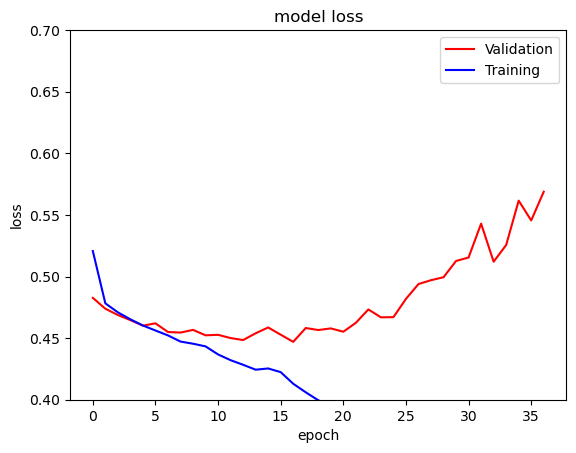

In [76]:
# Plot model evolution
model_evolution_loss(history,y_lim1=0.4,y_lim2=0.7)

In [295]:
# print metrics
test_set_evalution(model, X_train, X_valid, y_train, y_valid,X_train_test,y_train_test)
model.evaluate(X_train_test,y_train_test)

862/862 [==============================] - 2s 3ms/step - loss: 0.4185 - accuracy: 0.7858
Train set evaluation: [0.4184766113758087, 0.7858386635780334]
216/216 [==============================] - 1s 3ms/step - loss: 0.4550 - accuracy: 0.7571
Valid set evaluation: [0.45496058464050293, 0.7571449279785156]
270/270 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.7650
Test set evaluation: [0.4478234350681305, 0.7649721503257751]
270/270 [==============================] - 1s 3ms/step - loss: 0.4478 - accuracy: 0.7650


[0.4478234350681305, 0.7649721503257751]

Apply thresholding anad evaluate accuracy

In [296]:
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_train_test_pred = model.predict(X_train_test)

270/270 [==============================] - 0s 1ms/step


In [297]:
print(X_train.shape,X_valid.shape,X_train_test.shape)

(27568, 22) (6893, 22) (8616, 22)


In [298]:
print(y_train_pred.shape,y_valid_pred.shape,y_train_test_pred.shape)

(27568, 1) (6893, 1) (8616, 1)


In [299]:
y_train_pred[ y_train_pred > 0.5 ] = 1
y_train_pred[ y_train_pred <= 0.5 ] = 0
# do the same for the other arrays
y_valid_pred[ y_valid_pred > 0.5 ] = 1
y_valid_pred[ y_valid_pred <= 0.5 ] = 0
y_train_test_pred[ y_train_test_pred > 0.5 ] = 1
y_train_test_pred[ y_train_test_pred <= 0.5 ] = 0

In [300]:
from sklearn.metrics import accuracy_score

In [301]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_valid, y_valid_pred))
print(accuracy_score(y_train_test, y_train_test_pred))

0.7858386535113174
0.757144929638764
0.7649721448467967


In [314]:
print(y_train.mean())
print(y_valid.mean())
print(y_train_test.mean())

0.24332559489262914
0.25562164514725083
0.24500928505106778


## Now do prediction

In [337]:
X_test.shape

(13255, 22)

In [338]:
y_test_pred = model.predict(X_test) 

415/415 [==============================] - 1s 2ms/step


In [339]:
print(X_test.shape)
print(y_test_pred.shape)
print(y_test_pred.mean())
print(y_test_pred.sum())

(13255, 22)
(13255, 1)
0.19989377
2649.592


In [341]:
threshold = 0.6

In [342]:
y_test_pred[y_test_pred < threshold] = 0
y_test_pred[y_test_pred >= threshold] = 1

In [343]:
y_test_pred.mean()

0.024519049

In [83]:
submission = pd.read_csv("..\OriginalData\submission.csv")

In [84]:
submission.head()

,user_id,moved_after_2019
0,17449,NaN
1,33967,NaN
2,2110,NaN
3,55082,NaN
4,37165,NaN


In [86]:
#submission.moved_after_2019 = y_test_pred.astype(int)
submission.moved_after_2019 = 0
submission

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0
...,...,...
13250,32847,0
13251,20054,0
13252,7029,0
13253,56130,0


In [89]:
submission.to_csv("..\Submissions\submission_allzero.csv",index=False)

In [348]:
submission.to_csv(f"Submissions\submission_t{threshold}.csv",index=False)

In [326]:
submission.moved_after_2019.mean()

0.1847604677480196

,user_id,moved_after_2019
0,17449,0.0
1,33967,0.0
2,2110,0.0
3,55082,0.0
4,37165,0.0
...,...,...
13250,32847,0.0
13251,20054,0.0
13252,7029,0.0
13253,56130,0.0
